# Walkthrough - Gamma n Mutual Infor



In [14]:
import sys, os

# Insert path to model directory,.
cwd = os.getcwd()
path = f"{cwd}/../../src"
sys.path.insert(0, path)

# Insert path to package,.
pysim_path = f"/home/emmanuel/code/pysim/"
sys.path.insert(0, pysim_path)

import pathlib

import warnings
from typing import Optional, Tuple
from tqdm import tqdm
import random
import pandas as pd
import numpy as np
import argparse
from sklearn.utils import check_random_state

# toy datasets
from data.distribution import DataParams, Inputs

# Kernel Dependency measure
from models.dependence import HSICModel
from pysim.kernel.utils import GammaParam, SigmaParam
from sklearn.gaussian_process.kernels import RBF

# RBIG IT measures
# from models.ite_algorithms import run_rbig_models

# Plotting
from visualization.distribution import plot_scorer

# experiment helpers
from tqdm import tqdm

# Plotting Procedures
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['seaborn-talk'])
warnings.filterwarnings('ignore') # get rid of annoying warnings
%matplotlib inline

warnings.filterwarnings('ignore') # get rid of annoying warnings

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [15]:
FIG_PATH = "/home/emmanuel/projects/2019_hsic_align/results/figures/distribution_experiment/mutual_info/"
RES_PATH = "/home/emmanuel/projects/2019_hsic_align/data/results/distributions/mutual_info/"

In [16]:
!ls $RES_PATH/old

gauss_mi.csv  tstudent_mi.csv


## Datasets

* Samples - [500, 1K, 5K, 10K, 30K, 50K]
* Dimensions - [ 2, 3, 10, 50, 100]
* trials - `1:5`
* IT measures - Mutual Information
* Distributions - [Gaussian, T-Student]

## Gaussian Dataset

In [43]:
dataset = 'gauss' # other option tstudent

# results_df = pd.read_csv(f"{RES_PATH}old/{dataset}_mi.csv")
results_df = pd.concat([
    pd.read_csv(f"{RES_PATH}old/gauss_mi.csv", index_col=0),
    pd.read_csv(f"{RES_PATH}old/tstudent_mi.csv", index_col=0)
], )
results_df.tail()

,dataset,dimensions,gamma_X,gamma_Y,gamma_method,gamma_percent,gamma_scale,mutual_info,samples,score,scorer,std,trials,nu
37120,tstudent,100.0,0.004020,0.004022,median,0.5,NaN,8.028388,5000.0,0.974617,cka,1.0,5.0,9.0
37121,tstudent,100.0,0.003317,0.003327,median,0.6,NaN,8.028388,5000.0,0.977008,cka,1.0,5.0,9.0
37122,tstudent,100.0,0.002656,0.002643,median,0.7,NaN,8.028388,5000.0,0.979252,cka,1.0,5.0,9.0
37123,tstudent,100.0,0.002048,0.002049,median,0.8,NaN,8.028388,5000.0,0.981208,cka,1.0,5.0,9.0
37124,tstudent,100.0,0.001447,0.001447,median,0.9,NaN,8.028388,5000.0,0.983092,cka,1.0,5.0,9.0


In [47]:
from typing import List, Callable

def plot_individual_scores(
    scores_df: pd.DataFrame, 
    gamma_estimators: List, 
    scorer: str,
    dataset: str='gauss',
    mi_scale: Optional[Callable[[np.ndarray], np.ndarray]]=None
):
    # intialize plot
    fig, ax = plt.subplots()
    
    # subset dataset
    df_ = scores_df[scores_df['dataset'] == dataset]

    # subset hsic method
    df_ = df_[df_['scorer'] == scorer]
    
    if mi_scale is not None:
        df_['mutual_info'] = mi_scale(df_['mutual_info'])
    
    # subset gamma estimators
    for iestimator in gamma_estimators:
        # subsets
        sub_df = df_[df_['gamma_method'] == iestimator[0]]
        if iestimator[1] is not None:
            sub_df = sub_df[sub_df['gamma_percent'] == iestimator[1]]
        if iestimator[2] is not None:
            sub_df = sub_df[sub_df['gamma_scale'] == iestimator[2]]
        
        name = list(filter(None, iestimator))
        name = '_'.join(str(i) for i in name)
        ax.scatter(
            sub_df.score, 
            sub_df.mutual_info,
            s=50, label=f"{name}", zorder=3, marker='.')
    

    return fig, ax

#### Viz - Scott, Silverman

This should be the worst one for each of them because this method isn't taking into account the dimensions or the samples in a very smart way. It's fine for 1D examples, but we know that this isn't very good for data with a large number of samples or large number of dimensions.

In [48]:
demo_params = [
    ('silverman',None, None),
    ('scott', None, None),
#     *[('median', x, None) for x in np.arange(0.1, 1.0, 0.1, dtype=np.float64)]
]

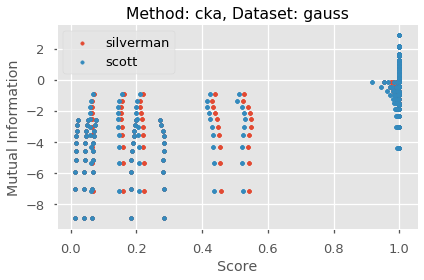

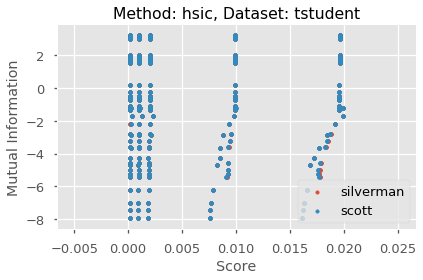

In [49]:
scorer = 'cka'
dataset = 'gauss'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_standard.png")

scorer = 'hsic'
dataset = 'tstudent'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_standard.png")



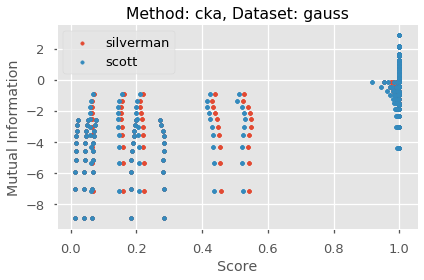

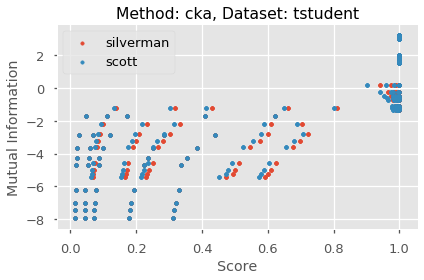

In [51]:
scorer = 'cka'
dataset = 'gauss'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_standard.png")

scorer = 'cka'
dataset = 'tstudent'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_standard.png")

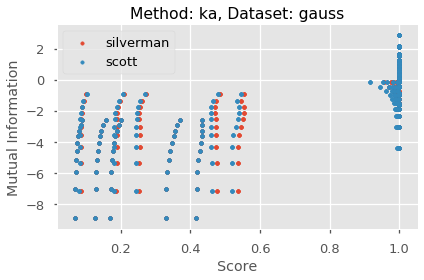

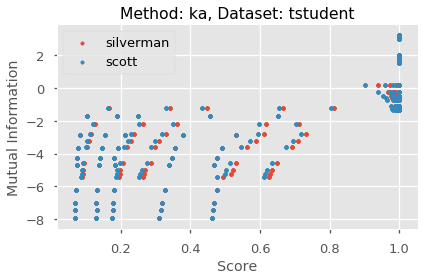

In [52]:
scorer = 'ka'
dataset = 'gauss'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_standard.png")

scorer = 'ka'
dataset = 'tstudent'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_standard.png")

#### Viz - Median Distances (All)

So for this, I will be looking at a few median distance values. This is the standard method so it will be good to compare.

In [91]:
[('median', x, None) for x in np.arange(0.1, 1.0, 0.1, dtype=np.float64)]

[('median', 0.1, None),
 ('median', 0.2, None),
 ('median', 0.30000000000000004, None),
 ('median', 0.4, None),
 ('median', 0.5, None),
 ('median', 0.6, None),
 ('median', 0.7000000000000001, None),
 ('median', 0.8, None),
 ('median', 0.9, None)]

In [53]:
demo_params = [
    ('median', 0.30000000000000004, None),
    ('median', 0.5, None),
    ('median', 0.7000000000000001, None),
]
demo_params = [('median', x, None) for x in np.arange(0.1, 1.0, 0.1, dtype=np.float64)]

In [ ]:
projects/2019_hsic_align/results/figures/distribution_experiment/mutual_info

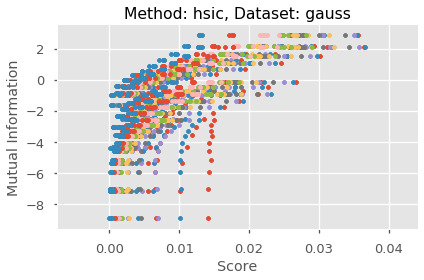

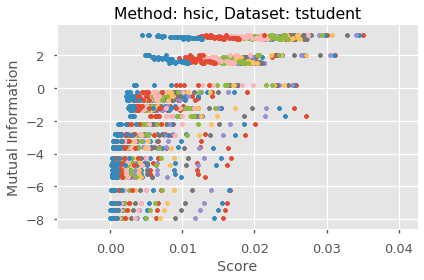

In [55]:
scorer = 'hsic'
dataset = 'gauss'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

scorer = 'hsic'
dataset = 'tstudent'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")


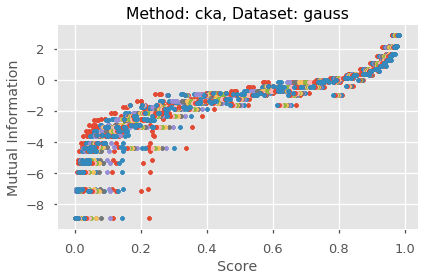

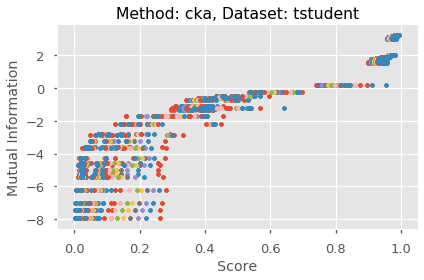

In [56]:
scorer = 'cka'
dataset = 'gauss'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

scorer = 'cka'
dataset = 'tstudent'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

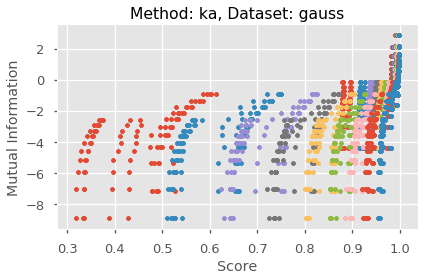

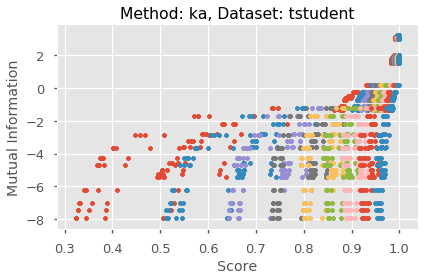

In [57]:
scorer = 'ka'
dataset = 'gauss'
fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

scorer = 'ka'
dataset = 'tstudent'
fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

In [58]:
#### Reasonable

In [59]:
demo_params = [
    ('median', 0.30000000000000004, None),
    ('median', 0.5, None),
    ('median', 0.7000000000000001, None),
]

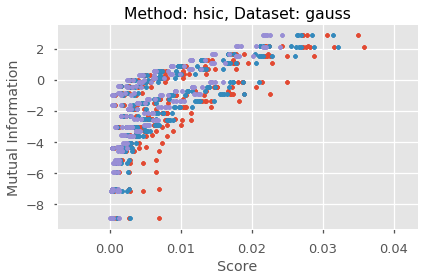

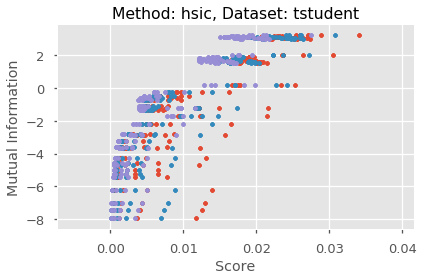

In [60]:
scorer = 'hsic'
dataset = 'gauss'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

scorer = 'hsic'
dataset = 'tstudent'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

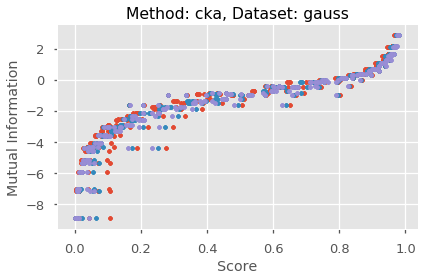

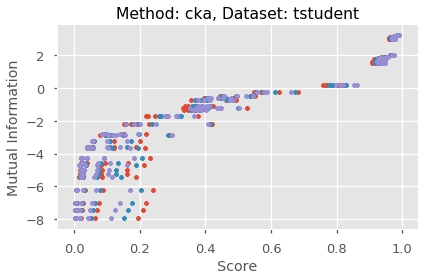

In [61]:
scorer = 'cka'
dataset = 'gauss'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

scorer = 'cka'
dataset = 'tstudent'

fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

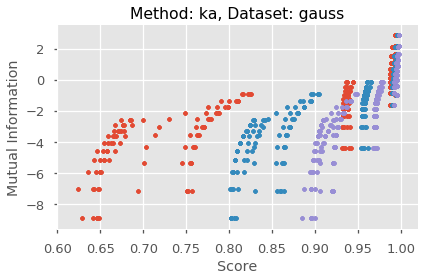

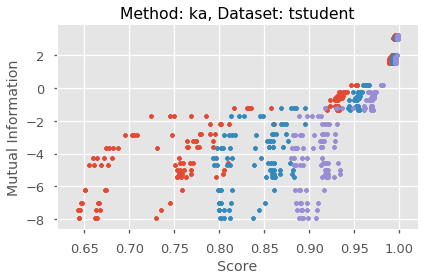

In [62]:
scorer = 'ka'
dataset = 'gauss'
fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")

scorer = 'ka'
dataset = 'tstudent'
fig, ax = plot_individual_scores(results_df, demo_params, scorer, dataset, mi_scale=np.log2)
ax.set_xlabel(f"Score")
ax.set_ylabel(f"Mutual Information")
ax.set_title(f"Method: {scorer}, Dataset: {dataset}")
# ax.legend()
plt.tight_layout()
fig.savefig(f"{FIG_PATH}{scorer}_{dataset}_median_all.png")